In [ ]:
# Calling all the libraries
library(dplyr)


#14 Basic Statistics (Using R)

By: Jérémie Auger - Feb. 2021

Adapted from: https://bookdown.org/mikemahoney218/IDEAR/basic-statistics-using-r.html

##14.1 Purpose of the Unit
This isn’t a statistics book. However, R is a statistical computing language, and many of the functions built into R are designed for statistical purposes. As such, we’re going to very quickly go over some statistical terms and a few of the statistical functions built into R. That way, you’ll have a better understanding of what exactly it is that we’re doing in later chapters.



##14.2.1 Data Concepts
We’ve already discussed some data concepts in this course, such as the ideas of rectangular and tidy data. However, those discussions are buried in the text of the last chapter, so are hard to refer to - and I want to make sure these concepts are all contained in the same place, for a clean reference section.

###Vector
*   Sequence of data elements of the same type
*   Each element of the vector are also called components, members, or values
*   Created in R using  c()

###Dataframe
*   A list of vectors of identical lengths
*   Example:  iris 

###Variable
*   A trait or condition that can exist in different quantities or types
*   We measure the impacts of independent predictor variables on dependent response variables

###Continuous Data
*   Numeric data which is not restricted to certain values - there are an infinite number of possible values

###Discrete Data
*   Numeric data which is restricted to certain values - for example, number of kids (or trees, or animals) has to be a whole integer
###Categorical Data
*   Data which can only exist as one of a specific set of values - for example, house color or zip code; Binned numeric data (e.g. “between 1 and 2 inches”) is typically categorical
####Binary Data
 *    Categorical data where the only values are 0 and 1
 *    Often used in situations where a “hit” - an animal getting trapped, a customer clicking a link, etc - is a 1, and no hit is a 0

###Ordinal Data
*   A type of categorical data where each value is assigned a level or rank
*   Useful with binned data, but also in graphing to rearrange the order categories are drawn
*   Referred to in R as “factors”

###Unstructured Data
*   Data without a strict format, typically composed of text
*   R used to deal with unstructured data by converting it to factors; while this isn’t necessary anymore, some functions still require text data to be in factor form

###Data Distribution
*   How often every possible value occurs in a dataset
*   Usually shown as a curved line on a graph, or a histogram

###Normal Distribution
*   Data where mean = median, 2/3 of the data are within one standard deviation of the mean, 95% of the data are within two SD and 97% are within 3. Many statistical analyses assume your data are normally distributed; Many datasets - especially in nature - aren’t

###Skewed Distribution
*   Data where the median does not equal the mean
*   A left-skewed distribution has a long tail on the left side of the graph, while a right-skewed distribution has a long tail to the right
*   Named after the tail and not the peak of the graph, as values in that tail occur more often than would be expected with a normal distribution






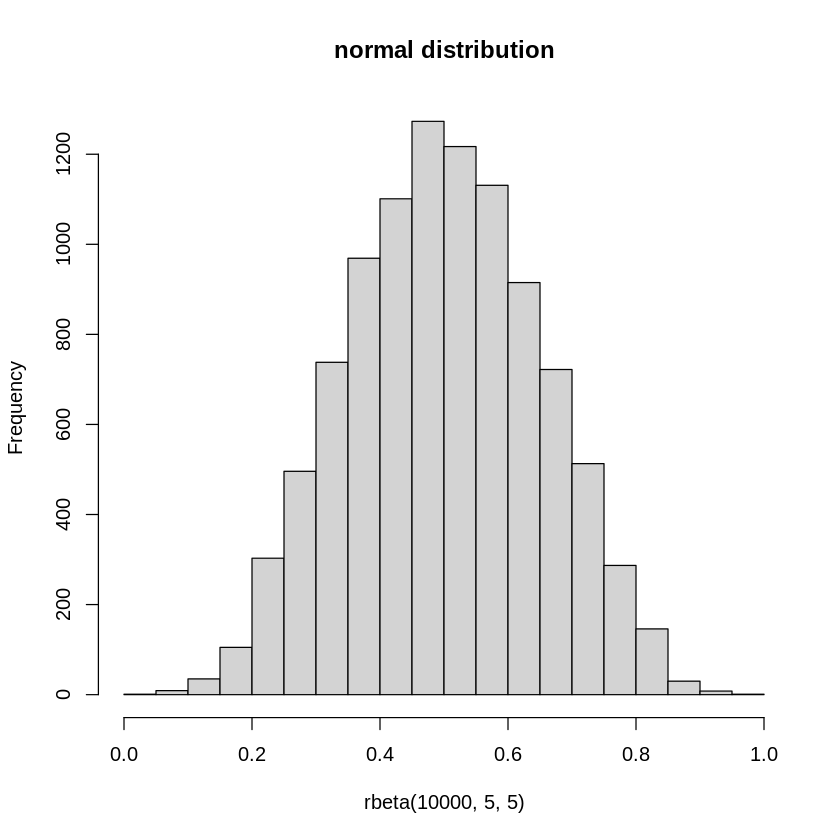

In [ ]:
# Demonstrating the skewed distributions - using the rbeta function to generate the distributions 

# Normal distribution, mean and median are equal
hist(rbeta(10000,5,5), main = "normal distribution")


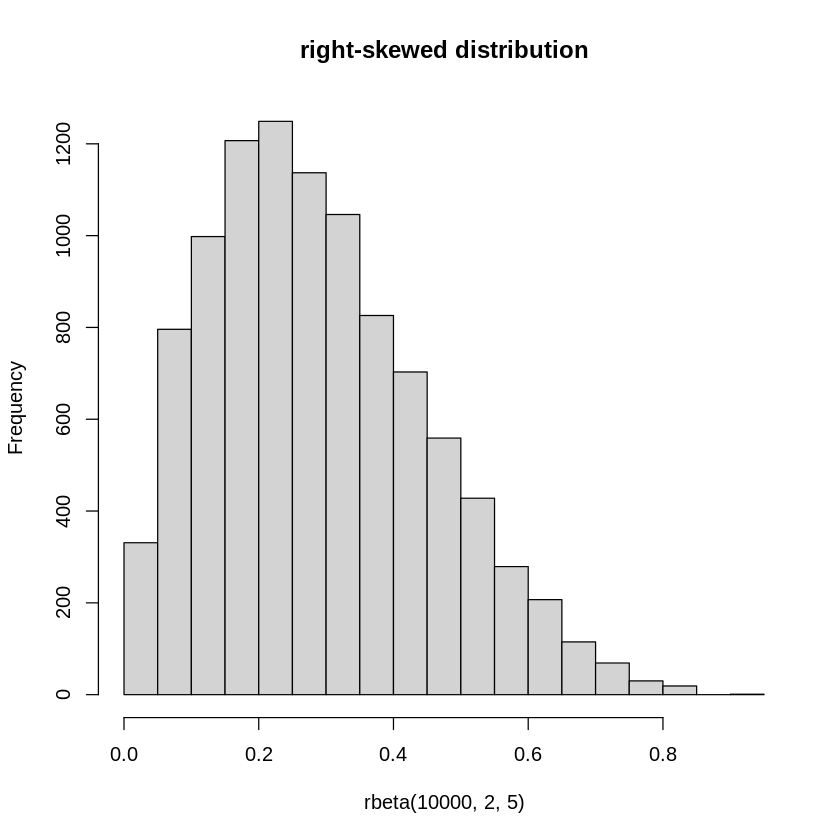

In [ ]:
# right-skewed distribution

hist(rbeta(10000,2,5), main = "right-skewed distribution")


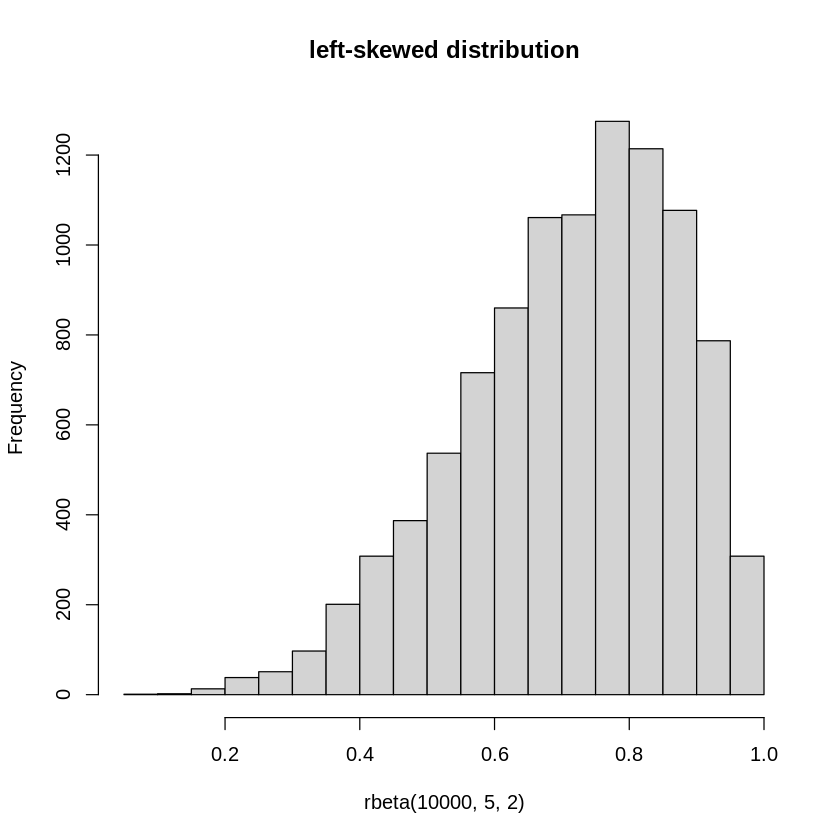

In [ ]:
# left-skewed distribution

hist(rbeta(10000,5,2), main = "left-skewed distribution")


##14.2.2 Statistical Terms
###Estimate
*   A statistic calculated from your data is called an estimate as we are approximating population-level values from sample data
*   Synonynm: metric

###Hypothesis Testing
*   Comparing the null hypothesis (typically, that two quantities are equivalent) to an alternative hypothesis
*   The alternative hypothesis in a two-tailed test is that the quantities are different, while the alternative hypothesis in a one-tailed test is that one quantity is larger or smaller than the other
*   Almost never used in business, as the important question is usually not does x cause y but can x predict y

###p Value:
*   The probability of seeing an effect of the same size as our results given a random model
*   High p values often mean your independent variables are irrelevant, but low p values don’t mean they’re important - that judgement requires a rational justification, and examining the effect size and importance. Otherwise you’re just equating correlation and causation.
*   The 0.05 thing is from a single sentence, taken out of context, from a book published in 1925. There’s no reason to set a line in the sand for “significance” - 0.05 means that there’s a 1 in 20 probability your result could be random chance, and 0.056 means it’s 1 in 18. Those are almost identical odds.
*   Some journals have banned their use altogether, but others still will only accept “significant” results

#### --- Statement from the American Statistical Association:
 --- A p value, or statistical significance, does not measure the size of an effect or the importance of a result. By itself, a p value does not provide a good measure of evidence about a model or a hypothesis. ---


###“Robust”
*   A term meaning an estimate is less susceptible to outliers
*   Means are not robust, while medians are, for instance.

###Regression
*   A method to analyze the impacts of independent variables on a dependent variable
*   ANOVA and models are both types of regression analyses

###General Linear Model
*   Formulas representing the expected value of a response variable for given values of one or more predictors
###The typical y = mx + b format of model
*   Sometimes abbreviated GLM; R uses  lm()  to construct these

###Generalized Linear Model
*   Depending who you ask, these may or may not be linear models - they tweak the normal formula in one way or another to measure outcomes that general linear models can’t address
*.  In this course, we’ll only be using logistic models
*.  Sometimes abbreviated GLM; R uses  glm()  to construct these



##14.2.2.1 Estimates and Statistics

###n
*   The number of observations of a dataset or level of a categorical.
*   In R, run  nrow(dataframe)  or  length(Vector)  to calculate.


```
nrow(dataframe)
length(Vector)
```



In [ ]:
nrow(iris)
length(iris$Sepal.Length);
count(iris, Species) 

[1] 150

[1] 150

,Species,n
,<fct>,<int>
1,setosa,50
2,versicolor,50
3,virginica,50


###Mean
*   The average of a dataset, defined as the sum of all observations divided by the number of observations.


```
mean(Vector)
```



In [ ]:
mean(iris$Sepal.Length)

[1] 5.843333

###Variance
*   A measure of the spread of your data.
```
var(Vector) 
```


In [ ]:
var(iris$Sepal.Length) 

[1] 0.6856935

###Standard Deviation
*   The amount any observation can be expected to differ from the mean.
```
sd(Vector) 
```


In [ ]:
sd(iris$Sepal.Length) 

[1] 0.8280661

###Standard Error
*   The error associated with a point estimate (e.g. the mean) of the sample.
*   If you’re reporting the mean of a sample variable, use the SD. If you’re putting error bars around means on a graph, use the SE.

```
# No native function in R - run  
sd(Vector)/sqrt(length(Vector))
```


In [ ]:
sd(iris$Sepal.Length)/sqrt(length(iris$Sepal.Length)) 

[1] 0.06761132

###Median Absolute Deviation from the Median
*   Average distance between each datapoint and - in R - the median; A measure of spread in your data
*   Note that MAD often means mean absolute deviation from the mean, mean absolute deviation from the median, and a few other less common things - check your acronyms before using!
```
mad(Vector) 
```

In [ ]:
mad(iris$Sepal.Length) 

[1] 1.03782

###Median
*   A robust estimate of the center of the data.
```
median(Vector) 
```

In [ ]:
median(iris$Sepal.Length)

[1] 5.8

###Minimum / Maximum
*   The smallest value.
```
min(Vector) 
```
*   The largest value.
```
max(Vector)
```


In [ ]:
# Minimum sepal lenght 
min(iris$Sepal.Length)
# Maximum sepal lenght 
max(iris$Sepal.Length) 

[1] 4.3

[1] 7.9

###Range
*   The maximum minus the minimum.
```
max(Vector) - min(Vector) 
```


In [ ]:
max(iris$Sepal.Length) - min(iris$Sepal.Length) 

[1] 3.6

###Quantile
*   The n quantile is the value at which, for a given vector, n percent of the data is below that value.

###Ranges from 0-1. Quantile * 100 = percentile.
*   Quartiles are the 0.25, 0.5, and 0.75 quantiles
```
quantile(Vector, c(quantiles that you want)) 
```


In [ ]:
quantile(iris$Sepal.Length, c(0.25, 0.5, 0.75))

25% 50% 75% 
5.1 5.8 6.4


###Interquartile Range
*   The middle 50% of the data, contained between the 0.25 and 0.75 quantiles
```
IQR(Vector) 
```


In [ ]:
IQR(iris$Sepal.Length) 

[1] 1.3

##14.2.3 Models and Tests
 -- Note that most tests discussed here default to a 95% confidence level and a two-tailed test. If you want to learn how to change those for any function, type  ?FunctionName() . Functions not applicable to the  iris()  dataset do not currently have examples underneath them. --

###t Test
*   A method of comparing the means of two groups
*   If your group variable has more than two levels, don’t use a t test - use an ANOVA instead
```
t.test(Vector1, Vector2) 
```

###Chi-squared Test
*   A test to see if two categorical variables are related
*   The null hypothesis is that both variables are independent from one another
*  For more information - particularly on what form your data should be in - please [see this site](http://www.r-tutor.com/elementary-statistics/goodness-fit/chi-squared-test-independence).
```
chisq.test(Vector1, Vector2)
```

###Linear Models
*   A type of regression which predicts the value of a response variable at given values of independent predictor variables
*   If you need help understanding linear models, [here’s a lecture from Penn State](https://onlinecourses.science.psu.edu/stat501/node/250/).
*   The most important thing for our purposes is understanding that models are made up of terms, which are the predictor variables you give it, and coefficients, which are multiplied by those terms to calculate the value of our response.
*   Larger coefficients generally mean that variable is more important than others in the model, but only if the variables share units - one (much argued-over) way to compare coefficients between variables with different units is [discussed here](http://www.demog.berkeley.edu/~andrew/teaching/standard_coeff.pdf_)
*   Linear models also include an intercept term, which isn’t multiplied with any variable. This term being “significant” at p = whatever means literally nothing, and if it’s your only significant term, your model is useless.
```
lm(ResponseVector ~ PredictorVectors, data) 
```


In [ ]:
data(iris)
 
lm(Sepal.Length ~ Species, data = iris)


Call:
lm(formula = Sepal.Length ~ Species, data = iris)

Coefficients:
      (Intercept)  Speciesversicolor   Speciesvirginica  
            5.006              0.930              1.582  


###Logistic Models
*  A form of generalized linear model where the predictor variable is a binary vector
*  Extremely common in science and business to predict events - if a tree or animal will die, if a sale will be made, etc
 ```
glm(ResponseVector ~ PredictorVectors, data, family = "binomial") 
```

###ANOVA
*   A test to identify the impacts of one or more categorical variables on one or more numeric response variables
*   An altered form of the linear model
*   [This blog post](https://dynamicecology.wordpress.com/2014/10/02/interpreting-anova-interactions-and-model-selection/) does an interesting treatment on how to interpret ANOVA results with significant interactions 
```
anova(lm(ResponseVector ~ PredictorVectors, data))
```

*   Normally, you’ll save your model to an object using  <- , then run  anova()  on that object - so  ```model <- lm(Sepal.Length ~ Species, data = iris)``` , then  ```anova(model)```  - though nesting your functions as above returns the same result


In [ ]:
model <- lm(Sepal.Length ~ Species, data = iris) 
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Species,2,63.21213,31.6060667,119.2645,1.669669e-31
Residuals,147,38.95620,0.2650082,NA,NA


##14.2.4 How We’ll Compare Models 

-There are plenty of different ways to compare models, each with their own proponents and detractors. Rather than wade into those arguments, we’re going to use three of the most common metrics. Other metrics (RMSE, PRESS, BIC, etc) can also be generated from R’s modeling functions, but we won’t go into depth on those.

###R2
*   The percentage of variance in your data explained by your regression
*   The more independent predictor variables in a model, the higher the R2, all else being equal
*   The adjusted R2 is a better estimate of regression goodness-of-fit, as it adjusts for the number of variables in a model
```
summary(lm(ResponseVector ~ PredictorVector, data)) 


In [ ]:
model <- lm(Sepal.Length ~ Species, iris)
summary(model) 


Call:
lm(formula = Sepal.Length ~ Species, data = iris)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6880 -0.3285 -0.0060  0.3120  1.3120 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.0060     0.0728  68.762  < 2e-16 ***
Speciesversicolor   0.9300     0.1030   9.033 8.77e-16 ***
Speciesvirginica    1.5820     0.1030  15.366  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5148 on 147 degrees of freedom
Multiple R-squared:  0.6187,	Adjusted R-squared:  0.6135 
F-statistic: 119.3 on 2 and 147 DF,  p-value: < 2.2e-16


###RMSE
*   Root-mean square error
*   Standard deviation of the residuals - so tells you how accurate your model is
*   Lower == better

###Receiver Operating Characteristic Curve
*   R2 isn’t applicable to logistic models
*   Instead, we calculate the area under the ROC curve, with the area under the curve being abbreviated AUC
*   AUC represents the accuracy of your model, with random guessing having an AUC of 0.5 and a perfect model having an AUC of 1
*   AUC is sometimes referred to as the c-statistic

###AIC:
*   Akaike Information Criterion
*   For a single dataset, the model with the smallest AIC is your best model
*   But models with a ΔAIC (the difference between their two AICs) of < 2 (or 4, depending who you ask) are statistically identical
*   If your model has a ΔAIC of < 2 with the null model, it’s useless

###Cross Validation:
*   A method in which data is split into separate training and testing datasets, to evaluate the performance of the model on new data
*   The gold standard for examining model performance is for a model to be trained and tuned using the training datasets, then tested once and only once by generating predictions and calculating accuracy for the test dataset. You then report the statistics from this test.
*   A variation is k-fold cross validation, where the dataset is split into k sections. Models are then trained using every combination of k-1 sections (so if k = 3, three separate models would be trained on the combined 1st and 2nd, 2nd and 3rd, and 1st and 3rd datasets) and tested on the one section not included.
*   More information on cross validation and its implementation in [R here](http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/)


##14.3 Exercises
*   All examples here use the  Orange  dataset, which is automatically included in R. Note that the O is capitalized!
 *   1.	Look at  Orange  using either head or  as.tibble()  (you’ll have to run  library(tidyverse)  for that second option). What type of data are each of the columns?
 *   2.	Find the mean, standard deviation, and standard error of tree circumference.
 *   3.	Make a linear model which describes circumference (the response) as a function of age (the predictor). Save it as an object with  <- , then print the object out by typing its name. What do those coefficients mean?
 *   4.	Make another linear model describing age as a function of circumference. Save this as a different object.
 *   5.	Call  summary()  on both of your model objects. What do you notice?
 *   6.	Does this mean that trees growing makes them get older? Does a tree getting older make it grow larger? Or are these just correlations?
 *   7.	Does the significant p value prove that trees growing makes them get older? Why not?
